In [2]:
import torch

In [4]:
# we will take 12 words's embedding as the input for attention
# attention_score = softmax(q @ k.T / root(dk) + M)
# q = query, k = key, dk = dimension of key, v: value
# x_new = attention_score @ v
# M: masking matrix

c = 16   # dimension of word embedding
b = 4    # batch size
t = 12   # sequence length
dk = 16  # dimension of key, query, value

In [5]:
# generating random qkv
q = torch.randn(b, t, dk)
k = torch.randn(b, t, dk)
v = torch.randn(b, t, c)

In [77]:
matrix = torch.tensor([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])

# dim=0 means column-wise sum (dim=0 means we have to reduce dimension 0(row) to find sum hence column-wise)
print(torch.sum(matrix, dim=0))

tensor([12, 15, 18])


In [18]:
M = torch.zeros(t, t)
# for masked input, we set the value to -inf
mask = torch.tril(torch.ones(t, t))
# Convert to mask with -inf above the diagonal and 0 below
lookahead_mask = mask.masked_fill(mask == 0, float('-inf'))  # -inf for the upper triangle
lookahead_mask

tensor([[1., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [1., 1., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [1., 1., 1., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [1., 1., 1., 1., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [1., 1., 1., 1., 1., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [1., 1., 1., 1., 1., 1., -inf, -inf, -inf, -inf, -inf, -inf],
        [1., 1., 1., 1., 1., 1., 1., -inf, -inf, -inf, -inf, -inf],
        [1., 1., 1., 1., 1., 1., 1., 1., -inf, -inf, -inf, -inf],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., -inf, -inf, -inf],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., -inf, -inf],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., -inf],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [22]:
# transpose while keeping batch dimesion aside
# dim: -1 means the last dimension for softmax (row-wise)
attention_score = torch.softmax(q @ k.transpose(1, 2) / (dk ** 0.5) + lookahead_mask, dim=-1)
attention_score

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.4404, 0.5596, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.7662, 0.1761, 0.0577, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.3115, 0.4673, 0.1697, 0.0515, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.1552, 0.2121, 0.2124, 0.3224, 0.0978, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.2247, 0.1283, 0.3466, 0.1531, 0.1072, 0.0402, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.1419, 0.1254, 0.1083, 0.1446, 0.3183, 0.1587, 0.0027, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0432, 0.0826, 0.0306, 0.1073, 0.0586, 0.0251, 0.5862, 0.0663,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.2623, 0.0666, 0.0101, 0.2658, 0.0422, 0.0547, 0.0163

In [23]:
x_temp = attention_score @ v
x_temp       # after attention mechanism, the output 

tensor([[[-1.8987e-01, -3.6762e-01, -4.0130e-01,  9.1304e-01, -1.2901e+00,
           1.1330e+00, -9.4934e-01,  1.4501e+00,  2.0162e+00,  5.1108e-01,
          -3.9820e-01, -1.1240e+00, -2.2025e-01,  1.3185e-01, -5.4909e-01,
           1.4448e+00],
         [-9.1582e-01, -7.1349e-01, -1.0895e+00,  9.7827e-01,  2.8869e-01,
          -6.2276e-01, -7.3629e-01,  3.3440e-01,  1.1609e+00,  3.0013e-01,
          -4.1741e-02, -5.9999e-01,  1.9257e-01, -7.9097e-01,  2.9768e-01,
           7.9986e-01],
         [-2.9783e-01, -4.5048e-01, -6.1011e-01,  8.4934e-01, -7.5715e-01,
           4.7454e-01, -8.4245e-01,  1.1392e+00,  1.6208e+00,  3.9958e-01,
          -2.5993e-01, -8.9800e-01, -5.2969e-02, -2.2669e-01, -3.5180e-01,
           1.2150e+00],
         [-4.6204e-01, -5.9353e-01, -1.0379e+00,  6.7314e-01,  1.2360e-01,
          -6.3122e-01, -6.1380e-01,  6.8501e-01,  8.2316e-01,  2.1060e-01,
          -9.5281e-03, -4.8987e-01,  2.3065e-01, -9.0163e-01, -4.5902e-03,
           7.4851e-01],
    

In [13]:
# x_new = LayerNorm(x_temp + x)

In [24]:
# multi-head attention
# q, k, v are linearly projected h times with different weights
# attention-values are concatenated
# output is linearly projected again

# casual-multi-head attention
# carrying multi-head attention in parallel

In [26]:
X = torch.randn(b, t, c)   # input
lin_proj_1 = torch.nn.Linear (c, 3 * dk)  # linear projection (generating qkv together)
qkv = lin_proj_1(X)
qkv.shape

torch.Size([4, 12, 48])

<BarContainer object of 200 artists>

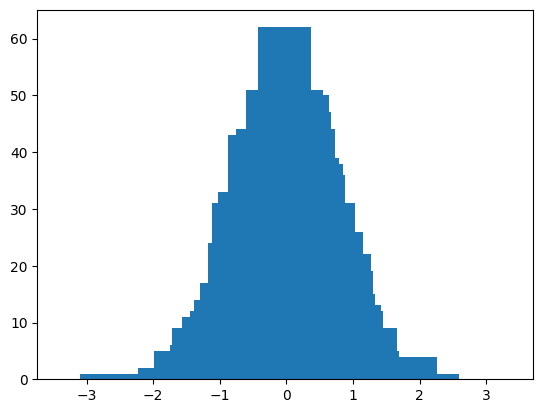

In [33]:
import matplotlib.pyplot as plt
import numpy as np
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1, 1, 0.01) * 3
plt.bar(x_val, y_val, align='center')

In [39]:
# near normal distribution
# split the qkv into n_heads

In [40]:
n_heads = 4

In [41]:
d = qkv.shape[-1]
qkv = qkv.reshape(b, t, n_heads, d // n_heads)
qkv.shape

torch.Size([4, 12, 4, 12])

In [45]:
# we need to do pooling of batch_dim and head_dim and perform cal with T * C
qkv = qkv.permute(0,2,1,3)

In [46]:
q, k, v = torch.chunk(qkv, 3, dim=-1)    # simple split along the last dimension

In [48]:
# batch: 4  heads: 4 seq_len: 12 head_size:4
# dk = n_heads * head_size
q.shape

torch.Size([4, 4, 12, 4])

In [49]:
# (B,H,T,D) @ (B,H,D,T) = (B,H,T,T)
attention_score = torch.softmax(q @ k.transpose(-2, -1) / (dk ** 0.5), dim=-1)

In [50]:
attention_score

tensor([[[[0.0929, 0.0831, 0.0714,  ..., 0.0674, 0.1031, 0.1233],
          [0.0862, 0.0812, 0.0784,  ..., 0.0856, 0.0853, 0.0925],
          [0.0672, 0.0649, 0.0872,  ..., 0.0943, 0.0883, 0.0864],
          ...,
          [0.0929, 0.0919, 0.0800,  ..., 0.0851, 0.0753, 0.0772],
          [0.0635, 0.0749, 0.0924,  ..., 0.0950, 0.0831, 0.0767],
          [0.0764, 0.0848, 0.0873,  ..., 0.0887, 0.0798, 0.0767]],

         [[0.0934, 0.0899, 0.0793,  ..., 0.0829, 0.0694, 0.0787],
          [0.0755, 0.0842, 0.0761,  ..., 0.0841, 0.0707, 0.0724],
          [0.0502, 0.0663, 0.0898,  ..., 0.0856, 0.0931, 0.0754],
          ...,
          [0.0936, 0.0875, 0.0881,  ..., 0.0833, 0.0801, 0.0862],
          [0.0376, 0.0694, 0.0935,  ..., 0.0925, 0.0909, 0.0625],
          [0.0810, 0.0867, 0.0868,  ..., 0.0851, 0.0864, 0.0817]],

         [[0.0660, 0.0871, 0.0852,  ..., 0.0829, 0.0724, 0.0987],
          [0.0815, 0.0840, 0.0832,  ..., 0.0788, 0.0806, 0.0989],
          [0.1307, 0.0857, 0.0753,  ..., 0

In [52]:
# (B,H,T,T) @ (B,H,T,D) = (B,H,T,D)
x_temp = attention_score @ v

In [75]:
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadSA(nn.Module):
    # constructor
    def __init__(self, n_heads, d_model, input_dim):  
        super().__init__()    
        assert d_model % n_heads == 0 , "Invalid head_size for the given d_model"
        self.n_heads = n_heads
        self.d_model = d_model
        self.head_size = d_model // n_heads
        self.input_dim = input_dim
        self.qkv_proj = nn.Linear(input_dim, 3 * d_model)
        self.linear = nn.Linear(d_model, d_model)
    
    def forward(self, X, mask = None):
        B, T, C = X.shape
        assert C == self.input_dim, "Input dimension does not match the model input dimension"
        qkv = self.qkv_proj(X)                                    # (B,T,3*D)
        qkv = qkv.reshape(B, T, self.n_heads, 3 * self.d_model // self.n_heads)
        qkv = qkv.permute(0,2,1,3)
        q, k, v = torch.chunk(qkv, 3, dim=-1)
        if mask is None:
            attention_score = torch.softmax(q @ k.transpose(-2, -1) / (self.head_size ** 0.5), dim=-1)
        else:
            attention_score = torch.softmax(q @ k.transpose(-2, -1) / (self.head_size ** 0.5) + mask, dim=-1)
        res = attention_score @ v                                       # (B,H,T,head_size)
        res = res.permute(0,2,1,3).reshape(B, T, self.d_model)   
        res = self.linear(res)

        return res               


In [76]:
input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5
x = torch.randn( (batch_size, sequence_length, input_dim) )
x.shape
model = MultiHeadSA(num_heads, d_model, input_dim)
out = model.forward(x)
out

tensor([[[-0.1187, -0.0802,  0.2717,  ...,  0.1765, -0.3697, -0.1359],
         [-0.1015, -0.1298,  0.3504,  ...,  0.2256, -0.3271, -0.2016],
         [-0.1035, -0.0761,  0.2271,  ...,  0.2417, -0.4300, -0.1929],
         [-0.0803, -0.0485,  0.2259,  ...,  0.2825, -0.3690, -0.0985],
         [-0.0925, -0.0296,  0.2512,  ...,  0.1752, -0.3954, -0.1690]],

        [[-0.0430, -0.0092, -0.1581,  ..., -0.0421,  0.1594, -0.2107],
         [ 0.0212, -0.0127, -0.2500,  ...,  0.0011,  0.1214, -0.3348],
         [-0.0139,  0.0245, -0.2587,  ..., -0.1047,  0.1383, -0.3125],
         [ 0.0167, -0.0491, -0.2390,  ...,  0.0016,  0.1532, -0.1549],
         [-0.0440, -0.0100, -0.2521,  ..., -0.0383,  0.1960, -0.2637]],

        [[ 0.0695,  0.0823,  0.0430,  ...,  0.0030,  0.0080, -0.1310],
         [-0.0080,  0.0683, -0.0282,  ..., -0.0559,  0.0234, -0.0781],
         [ 0.0118,  0.0380, -0.0590,  ..., -0.0470,  0.0515, -0.0642],
         [ 0.0229,  0.0035, -0.0518,  ..., -0.0286,  0.0356, -0.1156],
  